In [1]:
# READ DATA
import pandas as pd
dfs = pd.read_excel('OnlineRetail.xlsx', sheet_name='OnlineRetail')

In [2]:
#UNIQUE Values 
#exploring the unique values of each attribute
print("Number of transactions: ", dfs['InvoiceNo'].nunique())
print("Number of products bought: ",dfs['StockCode'].nunique())
print("Number of customers:", dfs['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(dfs['CustomerID'].isnull().sum() * 100 / len(dfs),2),"%" )
print('Number of countries: ',dfs['Country'].nunique())



('Number of transactions: ', 25900)
('Number of products bought: ', 4070)
('Number of customers:', 4372)
('Percentage of customers NA: ', 24.0, '%')
('Number of countries: ', 38)


In [4]:
#######--------------------------------------------------------------------------------------------------------------#####
# Cancelled invoices

# As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: -80995.
# We will look for the list of cancelled invoices and check if there is an invoice with that quantity.


In [6]:
#get canceled transactions
cancelled_orders = dfs[dfs['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [7]:
# How many canceled orders do we have?

In [8]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = dfs['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

('We have ', 9288, ' cancelled orders.')
Percentage of orders canceled: 9288/25900 (0.00%) 


In [9]:
#remove canceled orders
dfs = dfs[dfs['Quantity']>0]
dfs.shape

(531285, 8)

In [10]:
#remove rows where customerID are NA
dfs.dropna(subset=['CustomerID'],how='all',inplace=True)
dfs.shape

(397924, 8)

In [11]:
###### Multiplying Quantity and UnitPrice columns to get a new column : AmountSpend########
dfs['AmountSpend'] = dfs['Quantity']*dfs['UnitPrice']

In [12]:
dfs.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpend
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [13]:
#### Check if there is a negative AmountSpend in the filtered database
#  len(DataFrame.index) is equal to number of rows
negative_amountSpend = dfs[dfs['AmountSpend'] < 0]
len(negative_amountSpend.index)

0

In [19]:
###  Here we can see that there is no negative amount spend
## now to think about how to create User, Item matrix 
## My approach is to consider how much money did each User spent on each Item
## 


In [20]:
## Keeping relevant coluns from the Database
matrix_setup = dfs[['StockCode','CustomerID','AmountSpend']]
matrix_setup.shape

(397924, 3)

In [21]:
matrix_setup.describe()

,CustomerID,AmountSpend
count,397924.000000,397924.000000
mean,15294.315171,22.394749
std,1713.169877,309.055588
min,12346.000000,0.000000
25%,13969.000000,4.680000
50%,15159.000000,11.800000
75%,16795.000000,19.800000
max,18287.000000,168469.600000


In [22]:
#UNIQUE Values 
#exploring the unique values of each attribute

print("Number of products bought: ",matrix_setup['StockCode'].nunique())
print("Number of customers:", matrix_setup['CustomerID'].nunique() )



('Number of products bought: ', 3665)
('Number of customers:', 4339)


In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

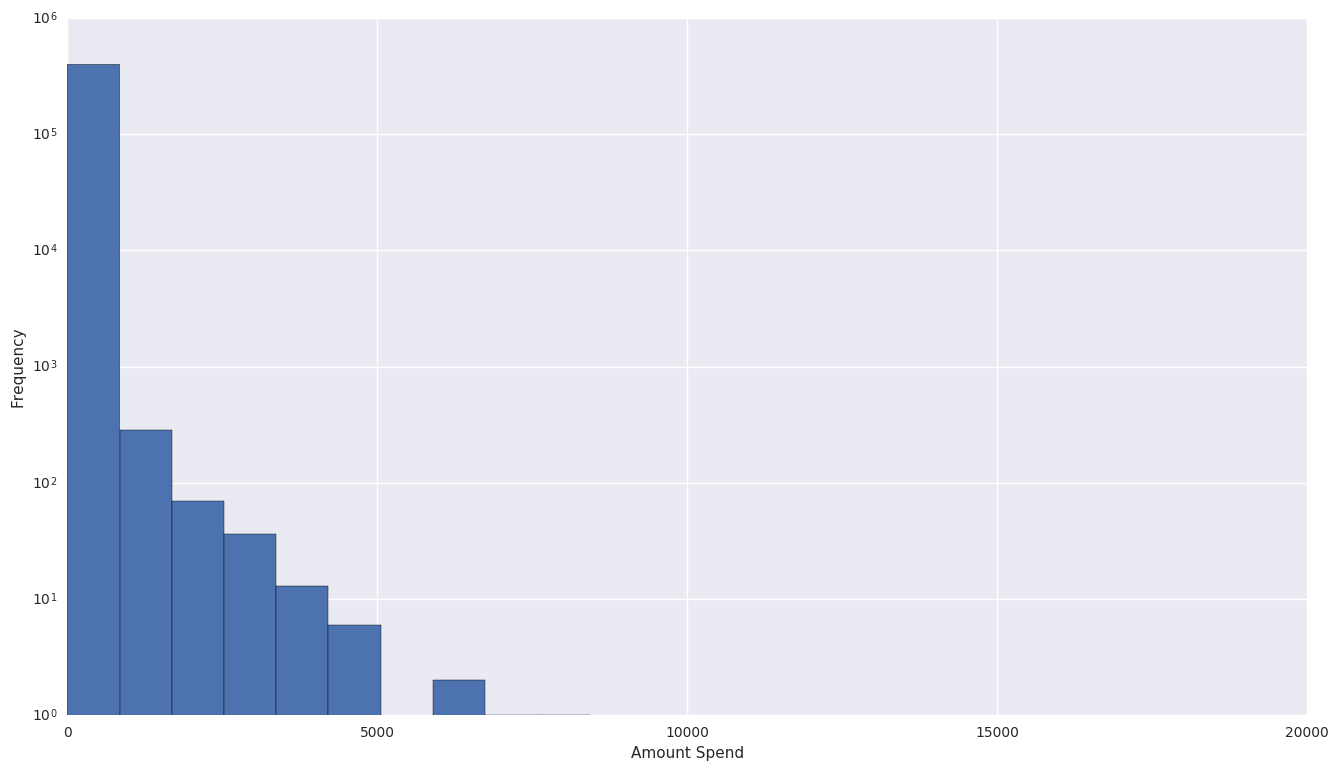

In [30]:
#plt.plot(a['CustomerID'])
import seaborn as sns
sns.set()
plt.hist(matrix_setup['AmountSpend'],bins=200, log=True)
plt.xlabel('Amount Spend')
plt.ylabel('Frequency')
plt.xlim(0,20000)
plt.show()

In [31]:
# finding outliers
matrix_setup[(matrix_setup['AmountSpend'] > 5000)].count()

StockCode      7
CustomerID     7
AmountSpend    7
dtype: int64

In [32]:
# removing outliers
matrix_setup = matrix_setup[(matrix_setup['AmountSpend'] < 5000)]

In [33]:
#UNIQUE Values 
#exploring the unique values of each attribute

print("Number of products bought: ",matrix_setup['StockCode'].nunique())
print("Number of customers:", matrix_setup['CustomerID'].nunique() )


('Number of products bought: ', 3664)
('Number of customers:', 4338)


In [34]:
import numpy as np
matrix_setup['Mean_amount'] = matrix_setup.groupby(['StockCode','CustomerID'])['AmountSpend'].transform(np.mean)

In [35]:
#matrix_setup.groupby(['StockCode' =' 85123A','CustomerID' =' 17850.0'])
matrix_setup.loc[(matrix_setup['StockCode'] == '85123A') & (matrix_setup['CustomerID'] == 17850.0)]

,StockCode,CustomerID,AmountSpend,Mean_amount
0,85123A,17850.0,15.3,18.582353
49,85123A,17850.0,15.3,18.582353
66,85123A,17850.0,15.3,18.582353
278,85123A,17850.0,15.3,18.582353
416,85123A,17850.0,20.4,18.582353
3118,85123A,17850.0,15.3,18.582353
3142,85123A,17850.0,15.3,18.582353
3192,85123A,17850.0,15.3,18.582353
3224,85123A,17850.0,15.3,18.582353
3425,85123A,17850.0,15.3,18.582353


In [36]:
# DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)[source]
mtarix_toGO = matrix_setup.drop_duplicates(subset = ['StockCode','CustomerID'], keep = 'first')

In [37]:
mtarix_toGO.loc[(matrix_setup['StockCode'] == '85123A') & (matrix_setup['CustomerID'] == 17850.0)]

,StockCode,CustomerID,AmountSpend,Mean_amount
0,85123A,17850.0,15.3,18.582353


In [38]:
# Unique transactions = length of any column
mtarix_toGO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266798 entries, 0 to 541908
Data columns (total 4 columns):
StockCode      266798 non-null object
CustomerID     266798 non-null float64
AmountSpend    266798 non-null float64
Mean_amount    266798 non-null float64
dtypes: float64(3), object(1)
memory usage: 10.2+ MB


In [39]:
#UNIQUE Values 
#exploring the unique values of each attribute

print("Number of products bought: ",mtarix_toGO['StockCode'].nunique())
print("Number of customers:", mtarix_toGO['CustomerID'].nunique() )

('Number of products bought: ', 3664)
('Number of customers:', 4338)


In [30]:
#from surprise.model_selection.search import GridSearchCV

In [57]:
# need to normalize the Mean_Amount column(which is going to be predicted) otherwise prediction takes a lot of time and also bad results
import numpy as np
min_amt = min(mtarix_toGO['Mean_amount'])
max_amt = max(mtarix_toGO['Mean_amount'])
print min_amt
print max_amt

0.0
4776.75


In [58]:
#Taking log on mean amount column
mtarix_toGO.loc[mtarix_toGO['Mean_amount'] == 0 ] = 0.001
mtarix_toGO['Log_Mean_amount'] = np.log(mtarix_toGO['Mean_amount'])

/home/sroder/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [30]:
# Normalized data [0,1]
#mtarix_toGO['Norm_Tot_Amnt']= (mtarix_toGO['Mean_amount'] -min_amt)/max_amt

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
#lower_bound = min(mtarix_toGO['Norm_Tot_Amnt'])
#upper_bound = max(mtarix_toGO['Norm_Tot_Amnt'])
lower_bound = min(mtarix_toGO['Log_Mean_amount'])
upper_bound = max(mtarix_toGO['Log_Mean_amount'])
print lower_bound
print upper_bound

-6.90775527898
8.47151567792


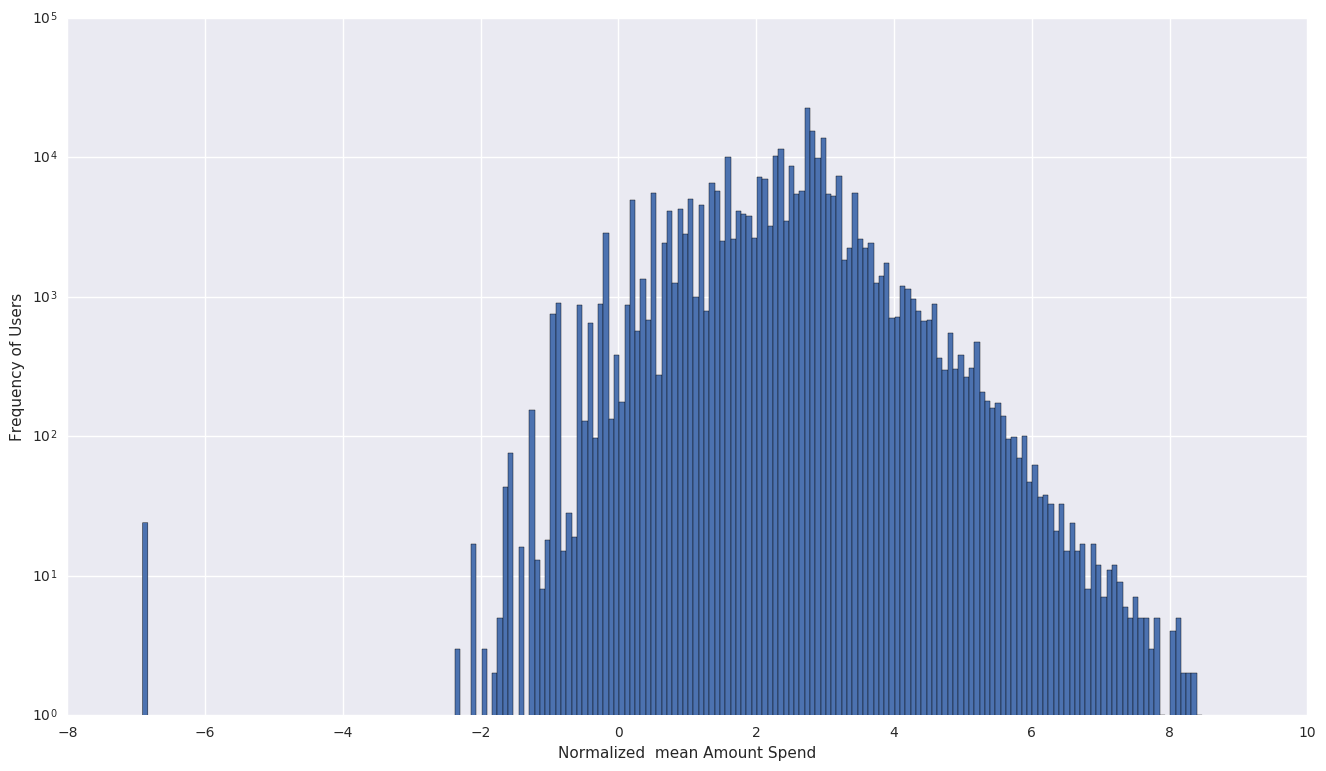

In [61]:
sns.set()
plt.hist(mtarix_toGO['Log_Mean_amount'],bins=200, log=True)
plt.xlabel('Normalized  mean Amount Spend')
plt.ylabel('Frequency of Users')
plt.show()

In [33]:
#dfx=mtarix_toGO[mtarix_toGO['Norm_Tot_Amnt'] <= 0.4]

In [34]:
#dfx.loc[dfx['Norm_Tot_Amnt'] == 0, 'Norm_Tot_Amnt'] = 0.000001

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
#lower_bound = min(dfx['Norm_Tot_Amnt'])
#upper_bound = max(dfx['Norm_Tot_Amnt'])
print lower_bound
print upper_bound

-6.90775527898
8.47151567792


In [69]:
from surprise import SVD,NMF,SVDpp,evaluate
from surprise.dataset import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.dataset import DatasetAutoFolds

In [70]:
#define the reader  with  upper and lower bounds , also now we are predicting Normalized Total Amount column
reader_x = Reader(rating_scale = (lower_bound,upper_bound))
#rating_scale(:obj:`tuple`, optional): The rating scale used for every rating.  Default is ``(1, 5)``.

# Assigning data as matrix_setup
#data = Dataset.load_from_df(df=mtarix_toGO[['CustomerID','StockCode','Norm_Tot_Amnt']],reader=reader)
#data = Dataset.load_from_df(df=matrix_setup[['CustomerID','StockCode','AmountSpend']],reader=None)

In [71]:
reader_x.rating_scale

(-6.9077552789821368, 8.4715156779195855)

In [73]:
from surprise.model_selection import train_test_split

In [75]:
data = Dataset.load_from_df(df=mtarix_toGO[['CustomerID','StockCode','Log_Mean_amount']],reader=reader_x)

In [76]:
data.raw_ratings[0:9]

[(17850.0, u'85123A', 10.82996764273396, None),
 (17850.0, 71053, 11.099392901051536, None),
 (17850.0, u'84406B', 10.893437216682626, None),
 (17850.0, u'84029G', 10.995852222110695, None),
 (17850.0, u'84029E', 10.939762755459652, None),
 (17850.0, 22752, 10.907541822864168, None),
 (17850.0, 21730, 11.165851817003619, None),
 (17850.0, 22633, 10.371858801140373, None),
 (17850.0, 22632, 10.371858801140373, None)]

In [77]:
for i in range(9):
    print (data.raw_ratings[i][2] - data.df['Log_Mean_amount'][i])

7.90775527898
7.90775527898
7.90775527898
7.90775527898
7.90775527898
7.90775527898
7.90775527898
7.90775527898
7.90775527898


In [42]:
#from surprise.model_selection.search import GridSearchCV

In [43]:
# check out time
import time
start_time = time.time()

In [78]:
#Train using best hyper parameters i.e. {'lr_all': 0.01, 'reg_all': 0.1, 'n_factors': 50, 'n_epochs': 500}
algo = SVD(lr_all=0.01, reg_all= 0.1, n_factors=50, n_epochs=100)
#algo = grid_search.best_estimator['rmse']

In [79]:
from surprise.model_selection import train_test_split
#from surprise import Trainset
#import math
#from collections import defaultdict
trainset, testset = train_test_split(data, test_size=.25, random_state=27, shuffle=True)

In [98]:
#testset

In [50]:
#------------------------------------spliting TRAINSET; tESTSET  DONE--------------------

In [99]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [100]:
# Predictions
predictions = algo.test(testset)

In [103]:
# Then compute error scores when log function is used for normalization
#, earlier RMSE: 0.0069 MAE: 0.0020 for min-max normalization

from surprise.accuracy import rmse,mae
#accuracy.rmse(predictions)
#accuracy.mae(predictions)
rmse(predictions)
mae(predictions)

RMSE: 0.5653
MAE:  0.3964


0.39638814735257399

In [169]:
# new RMSE: 0.5653 
# new MAE : 0.3964

In [104]:
test_list = []
for i in testset:
    test_list.append(i[-1])
test_list[:5]

[10.789758787207784,
 8.2793188354146192,
 10.78131991856192,
 10.923290179832307,
 11.616437360392252]

In [109]:
prediction_list = []
for i in predictions:
    prediction_list.append(i[3] + 7.90775527898)
prediction_list[:5]

[10.075123769410677,
 8.2847517713680521,
 10.842084029568758,
 10.591394715828322,
 11.610206911939843]

(0, 16)

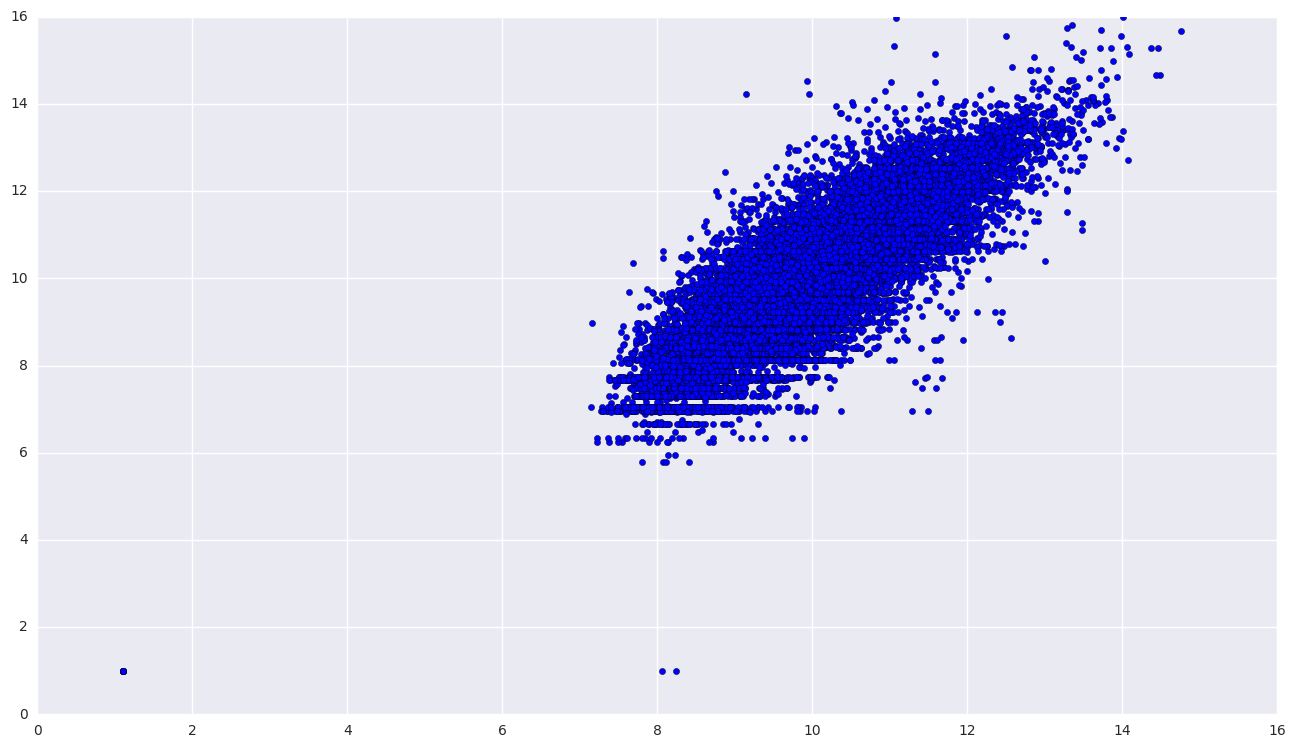

In [111]:
plt.scatter(prediction_list,test_list)
#plt.xlim(0,0.20)
plt.ylim(0,16)

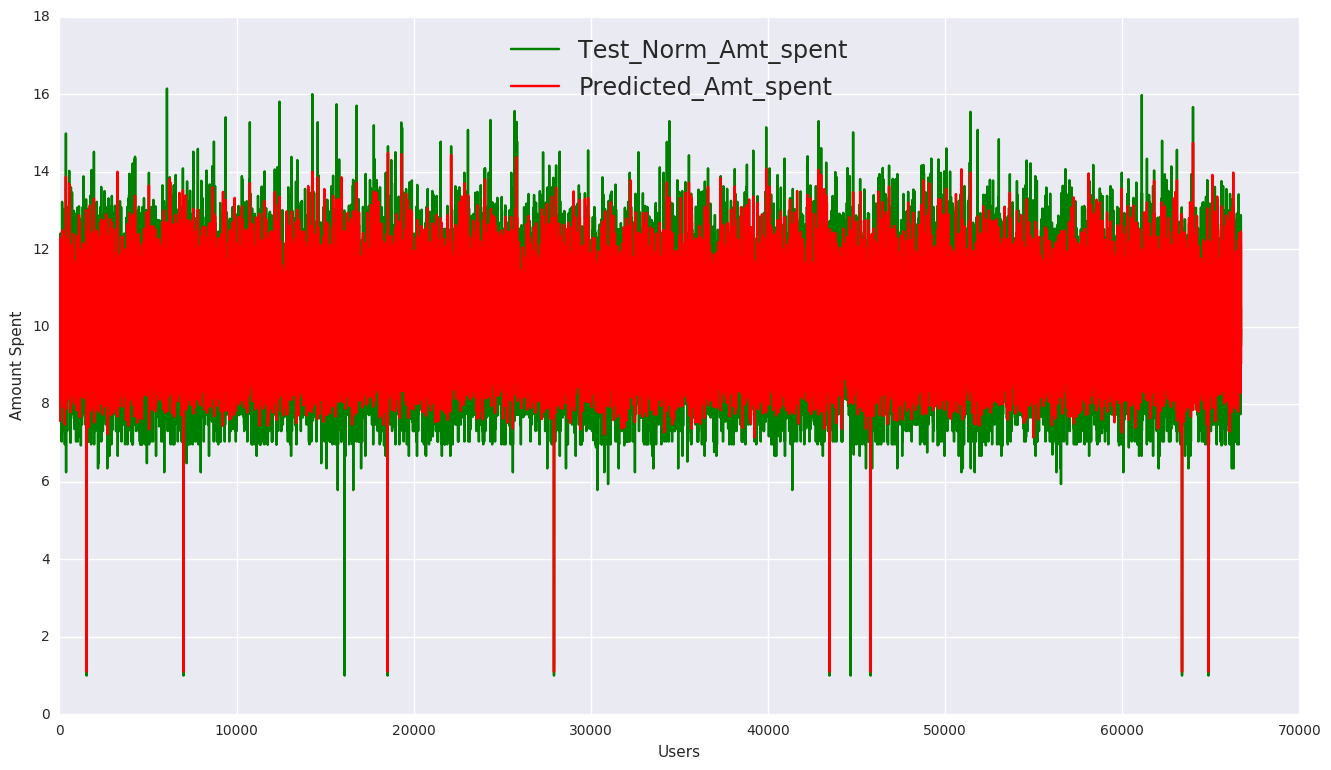

In [112]:
plt.plot(test_list,'g',label='Test_Norm_Amt_spent')
plt.plot(prediction_list,'r',label='Predicted_Amt_spent')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.xlabel('Users')
plt.ylabel('Amount Spent')